# Capstone 1

## Machine Learning In-Depth Analysis

## Contents

### -- Prepare the data and subdivide into training, validation, and test sets
### -- Logistic Regression
### -- SVC
### -- Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Prepare the Data

In [2]:
DF = pd.read_csv('model.csv', header=0, index_col=0)
DF.index = pd.to_datetime(DF.index.astype(str))

In [3]:
DF.shape

(244, 8)

In [4]:
DF.columns

Index(['CFNAI', 'CPI', 'M2', 'ISM', 'bfly', 'divy', 'Spread', 'Spread_bool'], dtype='object')

In [5]:
print('Drop the continuous target (\'Spread\')')

DF.drop('Spread', inplace=True, axis=1)

Drop the continuous target ('Spread')


### The convention in machine learning models that interact with financial data (e.g., stock selection, asset allocation, etc.) is to not exploit train_test_split and to instead split into contiguous sets, where the training set precedes the validation set, and the validation set precedes the testing set.  "Leakage" (the presence of past data at an existing point in time) has been averted during the wrangling phase, where many of the features were lagged and the target looked ahead to the next quarter's worth of observations.

### Generally, the training set is sufficiently larger than both the validation and the testing sets.  With 244 months (observations) of data, the first 200 constitute the training set, the next 24 the validation set, and the final 20 the testing set.

In [6]:
DF_train_x = DF.iloc[:200, :-1]
DF_train_y = DF.iloc[:200, -1]

DF_val_x = DF.iloc[200:224, :-1]
DF_val_y = DF.iloc[200:224, -1]

DF_test_x = DF.iloc[224:, :-1]
DF_test_y = DF.iloc[224:, -1]

print('With 244 months of data, subdivide into 200 months of training data, 24 months of validation data, and 20 month \
of test data.')

With 244 months of data, subdivide into 200 months of training data, 24 months of validation data, and 20 month of test data.


######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

# Logistic Regression

In [7]:
pen = ['l1', 'l2']
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

### Loop through penalty terms and values for C

In [8]:
np.random.seed(1)

trainscores_logreg = []
valscores_logreg = []

warnings.filterwarnings('ignore')

for i in pen:
    for j in Cs:
        logreg_model = LogisticRegression(C=j, penalty=i)
        logreg_model.fit(DF_train_x, DF_train_y)
        trainscores_logreg.append(logreg_model.score(DF_train_x, DF_train_y))
        valscores_logreg.append(logreg_model.score(DF_val_x, DF_val_y))

### Create labels that specify 'C' and 'penalty' that are to be used in a line plot

In [9]:
xlabl = []

for k in pen:
    for l in Cs:
        xlabl.append('pen='+ k + ', C=' + str(l))

### Plot the accuracy scores for the training and validation sets

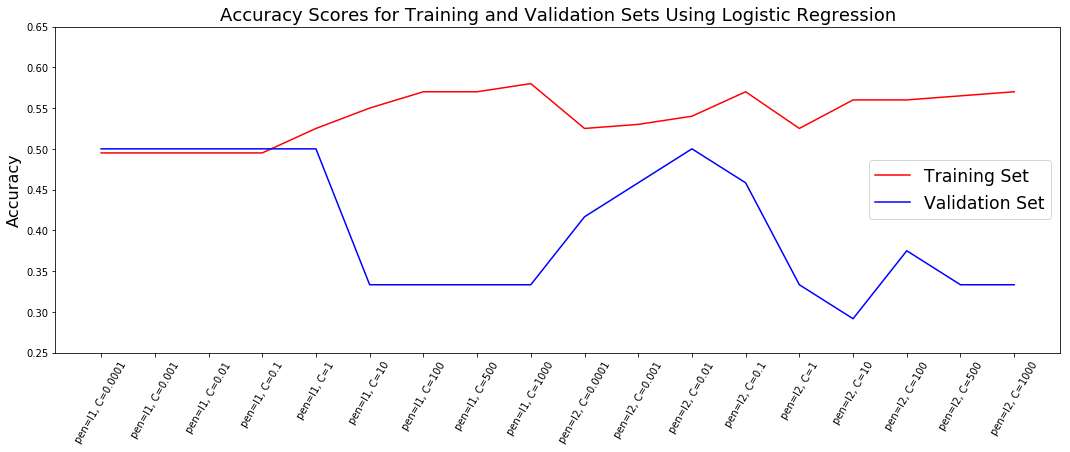

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))

x_tr = np.arange(0, len(trainscores_logreg), 1)
y_tr = trainscores_logreg
ax.plot(x_tr, y_tr, c='r')

x_v = np.arange(0, len(valscores_logreg), 1)
y_v = valscores_logreg
ax.plot(x_v, y_v, c='b')

ax.set_xticklabels(xlabl, rotation=60)
ax.xaxis.set_ticks(np.arange(0, len(trainscores_logreg), 1)) #np.arange(0, len(trainscores_logreg), 1)
ax.set_ylim([0.25, 0.65])
ax.set_xlabel(None)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_title('Accuracy Scores for Training and Validation Sets Using Logistic Regression', fontsize=18)

ax.legend(['Training Set', 'Validation Set'], loc='center right', fontsize='xx-large')

plt.show()

In [11]:
print('The above plot shows that the accuracy for the training set is slightly increasing as C increases, yet it never \
exceeds 60%.  The accuracy for the validation set is less than that for the training set as C increases, and the decline \
isn\'t monotonic.  The choice of a best combination of C and penalty term isn\t likely to generalize well to unseen data.')

The above plot shows that the accuracy for the training set is slightly increasing as C increases, yet it never exceeds 60%.  The accuracy for the validation set is less than that for the training set as C increases, and the decline isn't monotonic.  The choice of a best combination of C and penalty term isn	 likely to generalize well to unseen data.


In [12]:
print('The accuracy for the validation set that corresponds to the hyperparameter combination given by the highest \
accuracy in the training set is {0:.3f}.'.format(valscores_logreg[np.argmax(trainscores_logreg)]))

The accuracy for the validation set that corresponds to the hyperparameter combination given by the highest accuracy in the training set is 0.333.


In [13]:
print('The hyperparameters for the model that performs best on the training data are:', xlabl[np.argmax(trainscores_logreg)])

The hyperparameters for the model that performs best on the training data are: pen=l1, C=1000


### Train a logistic regressor using the 'best' hyperparameters and evaluate on the test set

In [14]:
logreg_model_best = LogisticRegression(C=1000, penalty='l1')
logreg_model_best.fit(DF_train_x, DF_train_y)
print('The accuracy on the training set is:', logreg_model_best.score(DF_train_x, DF_train_y))
print('The accuracy on the validation set is:', logreg_model_best.score(DF_val_x, DF_val_y))
print('The accuracy on the test set is:', logreg_model_best.score(DF_test_x, DF_test_y))

The accuracy on the training set is: 0.58
The accuracy on the validation set is: 0.3333333333333333
The accuracy on the test set is: 0.6


In [15]:
print('Iterating over various C\'s and alternating between l1 and l2 penalty terms, we don\'t come across a model that \
performs reliably on unseen data.  Taking the hyperparameters that map to best-performing training model (58% accuracy), \
we achieve an accuracy score of 33.3% on the validation set and then 60% on the test set.')

Iterating over various C's and alternating between l1 and l2 penalty terms, we don't come across a model that performs reliably on unseen data.  Taking the hyperparameters that map to best-performing training model (58% accuracy), we achieve an accuracy score of 33.3% on the validation set and then 60% on the test set.


### Train a logistic regressor using GridSearchCV, five-fold CV, and the same hyperparameters as above

In [16]:
parameters = {'C': Cs, 'penalty': pen}

logreg_gscv = LogisticRegression()

gscv = GridSearchCV(logreg_gscv, parameters, cv=5)
gscv.fit(DF_train_x, DF_train_y)
print('Best hyperparameters using GridSearchCV:', gscv.best_params_)
print('Best GridSearchCV score:', gscv.best_score_)

logreg_best_gscv = LogisticRegression(C=0.01, penalty='l2')
logreg_best_gscv.fit(DF_train_x, DF_train_y)
print('GridSearchCV score using training set:', logreg_best_gscv.score(DF_train_x, DF_train_y))
print('GridSearchCV score using validation set:', logreg_best_gscv.score(DF_val_x, DF_val_y))
print('GridSearchCV score using test set:', logreg_best_gscv.score(DF_test_x, DF_test_y))

Best hyperparameters using GridSearchCV: {'C': 0.01, 'penalty': 'l2'}
Best GridSearchCV score: 0.505
GridSearchCV score using training set: 0.54
GridSearchCV score using validation set: 0.5
GridSearchCV score using test set: 0.6


In [17]:
print('Performing a grid search using the same hyperparameters and five-fold cross-validation over the training set, the \
results are still modest: 54% accuracy on the full training set, 50% on the validation set, and 60% on the test set.  The \
behavior of the features might be such that they\'re not easily linearly separable, and hence a support vector machine \
classifier might be more appropriate.')

Performing a grid search using the same hyperparameters and five-fold cross-validation over the training set, the results are still modest: 54% accuracy on the full training set, 50% on the validation set, and 60% on the test set.  The behavior of the features might be such that they're not easily linearly separable, and hence a support vector machine classifier might be more appropriate.


######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

# SVC

## SVC Linear

In [18]:
gammas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10]

### Train a SVC model using the linear kernel and loop through values for C

In [19]:
trainscores_SVC = []
valscores_SVC = []

for m in Cs:
        SVC_lin_model = SVC(C=m, kernel='linear')
        SVC_lin_model.fit(DF_train_x, DF_train_y)
        trainscores_SVC.append(SVC_lin_model.score(DF_train_x, DF_train_y))
        valscores_SVC.append(SVC_lin_model.score(DF_val_x, DF_val_y))

### Create labels that specify 'C'

In [20]:
xlabl2 = ['C=' + str(n) for n in Cs]

### Plot the accuracy scores for the training and validation sets

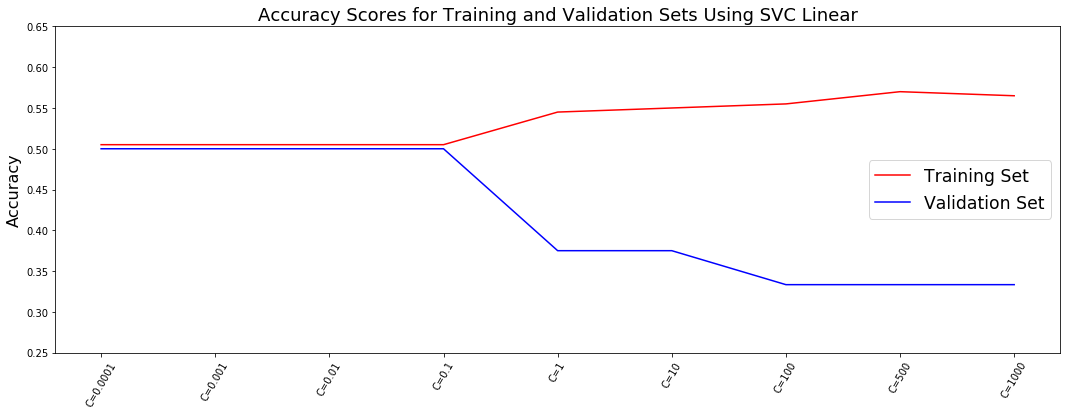

In [21]:
fig2, ax2 = plt.subplots(figsize=(18, 6))

x_tr2 = np.arange(0, len(trainscores_SVC), 1)
y_tr2 = trainscores_SVC
ax2.plot(x_tr2, y_tr2, c='r')

x_v2 = np.arange(0, len(valscores_SVC), 1)
y_v2 = valscores_SVC
ax2.plot(x_v2, y_v2, c='b')

ax2.set_xticklabels(xlabl2, rotation=60)
ax2.xaxis.set_ticks(np.arange(0, len(trainscores_SVC), 1)) #np.arange(0, len(trainscores_logreg), 1)
ax2.set_ylim([0.25, 0.65])
ax2.set_xlabel(None)
ax2.set_ylabel('Accuracy', fontsize=16)
ax2.set_title('Accuracy Scores for Training and Validation Sets Using SVC Linear', fontsize=18)

ax2.legend(['Training Set', 'Validation Set'], loc='center right', fontsize='xx-large')

plt.show()

In [22]:
print('The value of C for the model that performs best on the training data is:', xlabl2[np.argmax(trainscores_SVC)])

The value of C for the model that performs best on the training data is: C=500


### Train a SVC linear model using the 'best' C and then evaluate on the validation and test sets

In [23]:
SVC_lin_model_best = SVC(C=1000, kernel='linear')
SVC_lin_model_best.fit(DF_train_x, DF_train_y)
print('The accuracy on the validation set using the best hyperparameters is:', SVC_lin_model_best.score(DF_val_x, DF_val_y))

The accuracy on the validation set using the best hyperparameters is: 0.3333333333333333


In [24]:
print('The accuracy on the test set using the best hyperparameters is:', SVC_lin_model_best.score(DF_test_x, DF_test_y))

The accuracy on the test set using the best hyperparameters is: 0.65


In [25]:
print('The behavior of the above plot is expected of a model with weak predictive power: the lower the level of C, the \
stronger the regularization, the more likely the model is to predict 1 regardless of the value of the features.  As C \
increases, the regularization decreases, and the features become more influential.  The weakness lies in the fact that \
as C increases, the model steadily performs worse on the (unseen) validation data.')

The behavior of the above plot is expected of a model with weak predictive power: the lower the level of C, the stronger the regularization, the more likely the model is to predict 1 regardless of the value of the features.  As C increases, the regularization decreases, and the features become more influential.  The weakness lies in the fact that as C increases, the model steadily performs worse on the (unseen) validation data.


## SVC RBF

### Train a SVC RBF model by looping through values for C and gamma

In [26]:
trainscores_SVC_rbf = []
valscores_SVC_rbf = []

for o in Cs:
    for p in gammas:
        SVC_rbf_model = SVC(C=o, gamma=p, kernel='rbf')
        SVC_rbf_model.fit(DF_train_x, DF_train_y)
        trainscores_SVC_rbf.append(SVC_rbf_model.score(DF_train_x, DF_train_y))
        valscores_SVC_rbf.append(SVC_rbf_model.score(DF_val_x, DF_val_y))

### Create labels that specify C and gamma for each iteration

In [27]:
SVC_rbf_labels = ['C=' + str(q) + ', gamma=' + str(r) for q in Cs for r in gammas]

### Plot the accuracy scores for the training and validation sets

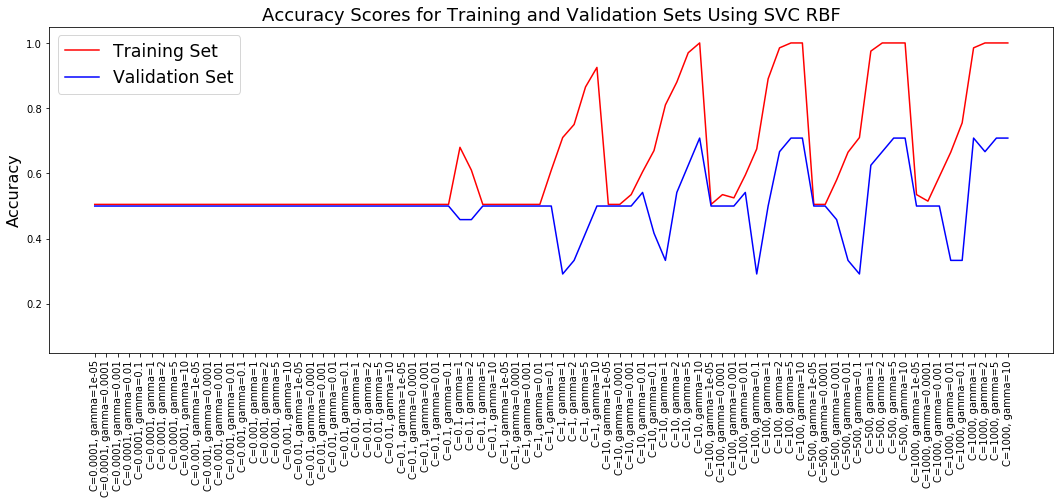

In [28]:
fig3, ax3 = plt.subplots(figsize=(18, 6))

x_tr3 = np.arange(0, len(trainscores_SVC_rbf), 1)
y_tr3 = trainscores_SVC_rbf
ax3.plot(x_tr3, y_tr3, c='r')

x_v3 = np.arange(0, len(valscores_SVC_rbf), 1)
y_v3 = valscores_SVC_rbf
ax3.plot(x_v3, y_v3, c='b')

ax3.set_xticklabels(SVC_rbf_labels, rotation=90)
ax3.xaxis.set_ticks(np.arange(0, len(trainscores_SVC_rbf), 1)) #np.arange(0, len(trainscores_logreg), 1)
ax3.set_ylim([0.05, 1.05])
ax3.set_xlabel(None)
ax3.set_ylabel('Accuracy', fontsize=16)
ax3.set_title('Accuracy Scores for Training and Validation Sets Using SVC RBF', fontsize=18)

ax3.legend(['Training Set', 'Validation Set'], loc='upper left', fontsize='xx-large')

plt.show()

In [29]:
print('The SVC RBF model performs better on the training and validation sets at higher levels of C and gamma.  We clearly \
see more power when the Gaussian kernel is applied and allows for a linear decision boundary to be more comfortably \
applied in the transformed space.  Given that this model iterates over two hyperparameters, a heatmap can better illustrate \
the optimal combination of C and gamma as they pertain to accuracy.')

The SVC RBF model performs better on the training and validation sets at higher levels of C and gamma.  We clearly see more power when the Gaussian kernel is applied and allows for a linear decision boundary to be more comfortably applied in the transformed space.  Given that this model iterates over two hyperparameters, a heatmap can better illustrate the optimal combination of C and gamma as they pertain to accuracy.


### Prepare and manipulate the data in order to create heatmaps for the training and validation realizations of the SVC RBF model

In [30]:
gamma_loop = gammas * 9
C_loop = np.repeat(Cs, 9)

In [31]:
df_heatmap_train = pd.DataFrame({'C': C_loop, 'gamma': gamma_loop, 'training scores': trainscores_SVC_rbf})
df_heatmap_train = df_heatmap_train.pivot('gamma', 'C', 'training scores')

df_heatmap_val = pd.DataFrame({'C': C_loop, 'gamma': gamma_loop, 'validation scores': valscores_SVC_rbf})
df_heatmap_val = df_heatmap_val.pivot('gamma', 'C', 'validation scores')

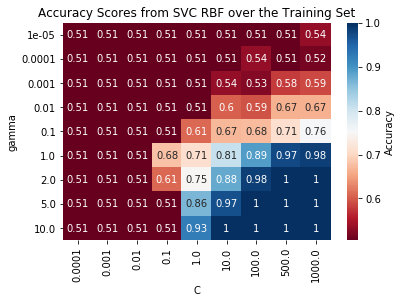

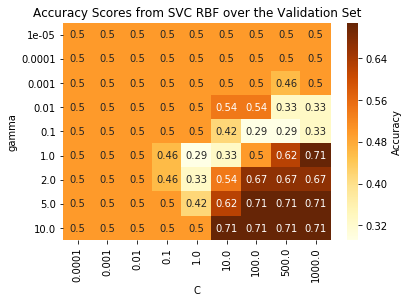

In [32]:
sns.heatmap(df_heatmap_train, cmap='RdBu', annot=True, cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Scores from SVC RBF over the Training Set')
plt.show()

plt.clf()

sns.heatmap(df_heatmap_val, cmap='YlOrBr', annot=True, cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Scores from SVC RBF over the Validation Set')
plt.show()

In [33]:
print('The heatmaps show higher accuracy at high C and high gamma.  Regardless of C and gamma, the accuracy is always \
higher for the training set than for the validation set.')

The heatmaps show higher accuracy at high C and high gamma.  Regardless of C and gamma, the accuracy is always higher for the training set than for the validation set.


### Select the best hyperparameters (high C and high gamma) and find the accuracy on the unseen test set

In [34]:
SVC_rbf_model_best = SVC(C=1000, gamma=10, kernel='rbf')
SVC_rbf_model_best.fit(DF_train_x, DF_train_y)
print('The accuracy on the test set using the best hyperparameters is:', SVC_rbf_model_best.score(DF_test_x, DF_test_y))

The accuracy on the test set using the best hyperparameters is: 0.4


In [35]:
print('Exploiting SVC using the Gaussian kernel and applying the hyperparameters that correspond to the highest training \
and validation scores (high C and high gamma), we arrive at a disappointing accuracy score of 40% on the test set.  The \
accuracy appears to decline as the unseen data is further removed over time from the training window.')

Exploiting SVC using the Gaussian kernel and applying the hyperparameters that correspond to the highest training and validation scores (high C and high gamma), we arrive at a disappointing accuracy score of 40% on the test set.  The accuracy appears to decline as the unseen data is further removed over time from the training window.


######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

## Random Forest

### Note: the below cell takes a few minutes to run (GridSearchCV over several features with cv=10)

In [36]:
RFC = RandomForestClassifier(random_state=1)
RFC_params = {'n_estimators': [100, 150, 200, 250, 300], 'max_features': [2, 3, 4], 'max_depth': [2, 3, 4]}

RFC_gscv = GridSearchCV(RFC, param_grid=RFC_params, cv=10)
RFC_gscv.fit(DF_train_x, DF_train_y)
print('Best hyperparameters using GridSearchCV:', RFC_gscv.best_params_)
print('Best GridSearchCV score:', RFC_gscv.best_score_)

Best hyperparameters using GridSearchCV: {'max_depth': 3, 'max_features': 2, 'n_estimators': 150}
Best GridSearchCV score: 0.53


In [37]:
RFC_best = RandomForestClassifier(n_estimators=150, max_depth=3, max_features=2, random_state=1)
RFC_best.fit(DF_train_x, DF_train_y)
RFC_best.score(DF_val_x, DF_val_y)

0.5416666666666666

In [38]:
print('Inflation is the most important feature using the RF model.')

pd.DataFrame({'Features': DF_train_x.columns, 'Feature Importances': RFC_best.feature_importances_})

Inflation is the most important feature using the RF model.


,Features,Feature Importances
0,CFNAI,0.134025
1,CPI,0.226826
2,M2,0.164528
3,ISM,0.108599
4,bfly,0.198917
5,divy,0.167105


In [39]:
RFC_best.score(DF_test_x, DF_test_y)

0.45

In [40]:
print('Tuning a few hyperparameters using a random forest classifier doesn\'t lead to an improvement over those results \
generated by the logistic regression or SVC models.')

Tuning a few hyperparameters using a random forest classifier doesn't lead to an improvement over those results generated by the logistic regression or SVC models.


## Conclusions

In [41]:
print('The performances by the logistic regression, SVC, and random forest models were uneventful as related to accuracy \
on the in-sample and out-of-sample data.  While no agreed-upon cutoff exists as to what accuracy threshold constitutes a \
model that performs reliably on unseen data, 70% tends to be the echelon for most models, provided that the models can \
reach this threshold on numerous realizations of unseen data.  Specific to this project, the SVC RBF model did perform at \
slightly above 70% on the validation set (one unseen path), the same model performed at 40% on the test set (another \
unseen path).')

print('\nAn important takeaway from the project is that the logistic regression and SVC models performed better at higher \
levels of C (and gamma), which are consistent with less shrinkage on the regressors (and a less smooth boundary in the \
transformed space).  Another important takeaway is that while the logistic regression models never exceeded 60% accuracy \
even on the training data, often the SVC models performed at above 70% at high C (and high gamma)')

The performances by the logistic regression, SVC, and random forest models were uneventful as related to accuracy on the in-sample and out-of-sample data.  While no agreed-upon cutoff exists as to what accuracy threshold constitutes a model that performs reliably on unseen data, 70% tends to be the echelon for most models, provided that the models can reach this threshold on numerous realizations of unseen data.  Specific to this project, the SVC RBF model did perform at slightly above 70% on the validation set (one unseen path), the same model performed at 40% on the test set (another unseen path).

An important takeaway from the project is that the logistic regression and SVC models performed better at higher levels of C (and gamma), which are consistent with less shrinkage on the regressors (and a less smooth boundary in the transformed space).  Another important takeaway is that while the logistic regression models never exceeded 60% accuracy even on the training data, often the SV

In [42]:
pd.DataFrame({'Logistic Regression': [logreg_model_best.score(DF_train_x, DF_train_y), \
                                     logreg_model_best.score(DF_val_x, DF_val_y), \
                                     logreg_model_best.score(DF_test_x, DF_test_y)], \
             'Logistic Regression, GSCV': [logreg_best_gscv.score(DF_train_x, DF_train_y), \
                                          logreg_best_gscv.score(DF_val_x, DF_val_y), \
                                          logreg_best_gscv.score(DF_test_x, DF_test_y)], \
              'SVC Linear': [SVC_lin_model_best.score(DF_train_x, DF_train_y), \
                          SVC_lin_model_best.score(DF_val_x, DF_val_y), \
                          SVC_lin_model_best.score(DF_test_x, DF_test_y)], \
              'SVC RBF': [SVC_rbf_model_best.score(DF_train_x, DF_train_y), \
                         SVC_rbf_model_best.score(DF_val_x, DF_val_y), \
                         SVC_rbf_model_best.score(DF_test_x, DF_test_y)], \
              'Random Forest, GSCV': [RFC_best.score(DF_train_x, DF_train_y), \
                                     RFC_best.score(DF_val_x, DF_val_y), \
                                     RFC_best.score(DF_test_x, DF_test_y)]}, index=['Training', 'Validation', 'Test'])

,Logistic Regression,"Logistic Regression, GSCV",SVC Linear,SVC RBF,"Random Forest, GSCV"
Training,0.580000,0.54,0.565000,1.000000,0.800000
Validation,0.333333,0.50,0.333333,0.708333,0.541667
Test,0.600000,0.60,0.650000,0.400000,0.450000


In [43]:
print('An observation found in the EDA and wrangling phases of the project was that the correlations between each feature \
and the target largely increased in magnitude during the financial crisis (denoted in the project as June 2007 through \
May 2009).  It was hypothesized that predictions might improve during this period.  However, not much of a material \
difference exists between the accuracy during this period and that during the broader training period, during which time \
the financial crisis occurs.')

pd.DataFrame({'Logistic Regression': logreg_model_best.score(DF_train_x.loc['2007-06':'2009-05'], \
                                                             DF_train_y.loc['2007-06':'2009-05']), \
             'Logistic Regression, GSCV': logreg_best_gscv.score(DF_train_x.loc['2007-06':'2009-05'], \
                                                                 DF_train_y.loc['2007-06':'2009-05']), \
              'SVC Linear': SVC_lin_model_best.score(DF_train_x.loc['2007-06':'2009-05'], \
                                                     DF_train_y.loc['2007-06':'2009-05']), \
              'SVC RBF': SVC_rbf_model_best.score(DF_train_x.loc['2007-06':'2009-05'], \
                                                  DF_train_y.loc['2007-06':'2009-05']), \
              'Random Forest, GSCV': RFC_best.score(DF_train_x.loc['2007-06':'2009-05'], \
                                                    DF_train_y.loc['2007-06':'2009-05'])}, \
             index=['Financial Crisis (Training)'])

An observation found in the EDA and wrangling phases of the project was that the correlations between each feature and the target largely increased in magnitude during the financial crisis (denoted in the project as June 2007 through May 2009).  It was hypothesized that predictions might improve during this period.  However, not much of a material difference exists between the accuracy during this period and that during the broader training period, during which time the financial crisis occurs.


,Logistic Regression,"Logistic Regression, GSCV",SVC Linear,SVC RBF,"Random Forest, GSCV"
Financial Crisis (Training),0.625,0.416667,0.541667,1.0,0.875


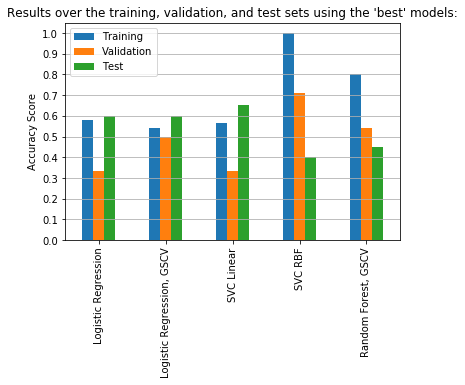

The logistic regression and SVC linear models witness unusual results in that performance is actually best on the test set.  Likely this is due to chance on the part of the test set and the weakness of these models.  By contrast, the SVC RBF and random forest models perform as expected -- the best performance is on the training set, with declining performance on the validation and then on the test sets.  Unfortunately, the accuracy witnessed on the unseen sets is such that one would have to think twice about launching a trading strategy using the given features and the given models.

The models' performance on the training data suggests that the features cannot be nicely linearly separated in the original space.  Feature transformations and orthogonal cuts make for better results on the training data, but then the performance declines on the unseen data.


In [44]:
score_DF = pd.DataFrame({'Logistic Regression': [logreg_model_best.score(DF_train_x, DF_train_y), \
                                     logreg_model_best.score(DF_val_x, DF_val_y), \
                                     logreg_model_best.score(DF_test_x, DF_test_y)], \
             'Logistic Regression, GSCV': [logreg_best_gscv.score(DF_train_x, DF_train_y), \
                                          logreg_best_gscv.score(DF_val_x, DF_val_y), \
                                          logreg_best_gscv.score(DF_test_x, DF_test_y)], \
              'SVC Linear': [SVC_lin_model_best.score(DF_train_x, DF_train_y), \
                          SVC_lin_model_best.score(DF_val_x, DF_val_y), \
                          SVC_lin_model_best.score(DF_test_x, DF_test_y)], \
              'SVC RBF': [SVC_rbf_model_best.score(DF_train_x, DF_train_y), \
                         SVC_rbf_model_best.score(DF_val_x, DF_val_y), \
                         SVC_rbf_model_best.score(DF_test_x, DF_test_y)], \
              'Random Forest, GSCV': [RFC_best.score(DF_train_x, DF_train_y), \
                                     RFC_best.score(DF_val_x, DF_val_y), \
                                     RFC_best.score(DF_test_x, DF_test_y)]}, index=['Training', 'Validation', 'Test'])

score_DF.T.plot(kind='bar')
plt.title('Results over the training, validation, and test sets using the \'best\' models:')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Accuracy Score')
plt.gca().yaxis.grid(True)
plt.show()

print('The logistic regression and SVC linear models witness unusual results in that performance is actually best on the \
test set.  Likely this is due to chance on the part of the test set and the weakness of these models.  By contrast, the \
SVC RBF and random forest models perform as expected -- the best performance is on the training set, with declining \
performance on the validation and then on the test sets.  Unfortunately, the accuracy witnessed on the unseen sets is \
such that one would have to think twice about launching a trading strategy using the given features and the given models.')

print('\nThe models\' performance on the training data suggests that the features cannot be nicely linearly separated in \
the original space.  Feature transformations and orthogonal cuts make for better results on the training data, but then \
the performance declines on the unseen data.')

### Next steps

In [45]:
print('Many revisions can be explored in hopes of attaining a more reliable model:\n\n -- alter the training, validation, \
and test set intervals: although tweaking the lengths of these intervals might be attempted, the hope is to engineer a \
model that performs well on numerous training, validation, and test intervals.  That performance in this iteration was \
lackluster suggests that this option shouldn\'t be explored. \n\n -- add or delete features: all but one of the features \
are macroeconomic and not directly connected to the constituents of the two portfolios.  Perhaps including more stock-\
level data might better reflect the uniquenesses of each portfolio so as to differentiate them. \n\n -- different \
classification models: Bayesian models weren\'t attempted in this project.  To do so, distributions would need to be fit \
to each feature, rather than merely accept the feature data "as is." \n\n -- alter the periodicity of the data: shortening \
the periodicity to weekly or daily would immediately increase the number of observations.  However, many of the \
macroeconomic data are reported monthly, and not one of the features is updated daily.  Daily or weekly imputation would \
be needed, but then the issue arises as to what imputation method is most appropriate.')

Many revisions can be explored in hopes of attaining a more reliable model:

 -- alter the training, validation, and test set intervals: although tweaking the lengths of these intervals might be attempted, the hope is to engineer a model that performs well on numerous training, validation, and test intervals.  That performance in this iteration was lackluster suggests that this option shouldn't be explored. 

 -- add or delete features: all but one of the features are macroeconomic and not directly connected to the constituents of the two portfolios.  Perhaps including more stock-level data might better reflect the uniquenesses of each portfolio so as to differentiate them. 

 -- different classification models: Bayesian models weren't attempted in this project.  To do so, distributions would need to be fit to each feature, rather than merely accept the feature data "as is." 

 -- alter the periodicity of the data: shortening the periodicity to weekly or daily would immediately increas